In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [4]:
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [5]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
46/46 - 0s - loss: 113997.0000
Epoch 2/400
46/46 - 0s - loss: 87665.4688
Epoch 3/400
46/46 - 0s - loss: 73813.6953
Epoch 4/400
46/46 - 0s - loss: 65244.1914
Epoch 5/400
46/46 - 0s - loss: 46737.2734
Epoch 6/400
46/46 - 0s - loss: 25270.8750
Epoch 7/400
46/46 - 0s - loss: 10007.5596
Epoch 8/400
46/46 - 0s - loss: 3012.9243
Epoch 9/400
46/46 - 0s - loss: 1379.8896
Epoch 10/400
46/46 - 0s - loss: 1194.6572
Epoch 11/400
46/46 - 0s - loss: 1121.0626
Epoch 12/400
46/46 - 0s - loss: 1066.6272
Epoch 13/400
46/46 - 0s - loss: 1058.4719
Epoch 14/400
46/46 - 0s - loss: 1004.1713
Epoch 15/400
46/46 - 0s - loss: 997.4169
Epoch 16/400
46/46 - 0s - loss: 988.9629
Epoch 17/400
46/46 - 0s - loss: 966.8229
Epoch 18/400
46/46 - 0s - loss: 959.4477
Epoch 19/400
46/46 - 0s - loss: 950.6226
Epoch 20/400
46/46 - 0s - loss: 932.6922
Epoch 21/400
46/46 - 0s - loss: 927.1387
Epoch 22/400
46/46 - 0s - loss: 919.9557
Epoch 23/400
46/46 - 0s - loss: 931.3467
Epoch 24/400
46/46 - 0s - loss: 900.8332
Epo

46/46 - 0s - loss: 521.2045
Epoch 199/400
46/46 - 0s - loss: 497.5564
Epoch 200/400
46/46 - 0s - loss: 508.9229
Epoch 201/400
46/46 - 0s - loss: 508.9754
Epoch 202/400
46/46 - 0s - loss: 525.4985
Epoch 203/400
46/46 - 0s - loss: 517.0552
Epoch 204/400
46/46 - 0s - loss: 543.4494
Epoch 205/400
46/46 - 0s - loss: 534.1364
Epoch 206/400
46/46 - 0s - loss: 507.7525
Epoch 207/400
46/46 - 0s - loss: 535.4286
Epoch 208/400
46/46 - 0s - loss: 559.6418
Epoch 209/400
46/46 - 0s - loss: 500.2621
Epoch 210/400
46/46 - 0s - loss: 512.9644
Epoch 211/400
46/46 - 0s - loss: 511.2699
Epoch 212/400
46/46 - 0s - loss: 505.2806
Epoch 213/400
46/46 - 0s - loss: 531.1941
Epoch 214/400
46/46 - 0s - loss: 504.9950
Epoch 215/400
46/46 - 0s - loss: 509.4220
Epoch 216/400
46/46 - 0s - loss: 489.3440
Epoch 217/400
46/46 - 0s - loss: 577.3937
Epoch 218/400
46/46 - 0s - loss: 577.6003
Epoch 219/400
46/46 - 0s - loss: 526.1810
Epoch 220/400
46/46 - 0s - loss: 561.8570
Epoch 221/400
46/46 - 0s - loss: 520.7594
Epoch 

Epoch 394/400
46/46 - 0s - loss: 477.5605
Epoch 395/400
46/46 - 0s - loss: 451.2695
Epoch 396/400
46/46 - 0s - loss: 465.9926
Epoch 397/400
46/46 - 0s - loss: 482.1811
Epoch 398/400
46/46 - 0s - loss: 504.1174
Epoch 399/400
46/46 - 0s - loss: 447.7841
Epoch 400/400
46/46 - 0s - loss: 476.2423


In [6]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 453.45 MSE (21.29 RMSE)
Test Score: 2029.01 MSE (45.04 RMSE)


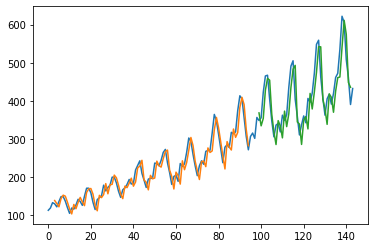

In [7]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()